In [2]:
# 핑크색 warning 안내문 방지 
import warnings
warnings.filterwarnings('ignore')

In [3]:
# 데이터 분석에 사용할 라이브러리를 불러옵니다
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [4]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux(Colab)
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family

plt.rc("font", family=get_font_family())
plt.rc("axes", unicode_minus=False)

In [5]:
import glob
path = glob.glob('data/*.csv')
path

['data\\olist_customers_dataset.csv',
 'data\\olist_geolocation_dataset.csv',
 'data\\olist_orders_dataset.csv',
 'data\\olist_order_items_dataset.csv',
 'data\\olist_order_payments_dataset.csv',
 'data\\olist_order_reviews_dataset.csv',
 'data\\olist_products_dataset.csv',
 'data\\olist_sellers_dataset.csv',
 'data\\product_category_name_translation.csv']

In [6]:
# 각각의 데이터셋 import 
df_customers = pd.read_csv(path[0])
df_geolocation = pd.read_csv(path[1])
df_orders = pd.read_csv(path[2])
df_items = pd.read_csv(path[3])
df_payments = pd.read_csv(path[4])
df_reviews = pd.read_csv(path[5])
df_products = pd.read_csv(path[6])
df_sellers = pd.read_csv(path[7])
df_category = pd.read_csv(path[8])

In [7]:
df_sellers

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


In [8]:
#Olist에 입점한 seller의 수는 3095명 
df_sellers['seller_id'].nunique()

3095

In [9]:
df_customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [10]:
df_orders
# 주문건수 99441개 

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [11]:
df_items


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [12]:
# order_id 한개에 (주문 한개에 여러 상품을 주문한게 있어서 (df_orders의 order_id 갯수랑 일치하지 않는 것)
df_items['order_id'].nunique()

98666

In [13]:
df_items['seller_id'].nunique()
# 어쨌든 모든 셀러가 한번씩은 판매경험이 있다는 것을 증명함 

3095

In [14]:
# 셀러는 3095명 
df_sellers

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


In [15]:
df_products

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [16]:
df = df_orders.merge(df_customers, on = 'customer_id', how = 'left')
df = df.merge(df_items, on  = 'order_id', how = 'outer')
df = df.merge(df_sellers, on = 'seller_id', how = 'outer')
df = df.merge(df_products, on = 'product_id', how = 'outer')
df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,3a51803cc0d012c3b5dc8b7528cb05f7,3366,...,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,ef0996a1a279c26e7ecbd737be23d235,2290,...,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-10-27 16:48:46,2017-11-07 18:04:59,2017-11-13 00:00:00,e781fdcc107d13d865fc7698711cc572,88032,...,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
4,8736140c61ea584cb4250074756d8f3b,ab8844663ae049fda8baf15fc928f47f,delivered,2017-08-10 13:35:55,2017-08-10 13:50:09,2017-08-11 13:52:35,2017-08-16 19:03:36,2017-08-23 00:00:00,02c9e0c05a817d4562ec0e8c90f29dba,8577,...,maua,SP,bebes,58.0,398.0,3.0,238.0,20.0,10.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113420,1ab38815794efa43d269d62b98dae815,a0b67404d84a70ef420a7f99ad6b190a,delivered,2018-07-01 10:23:10,2018-07-05 16:17:52,2018-07-04 14:34:00,2018-07-09 15:06:57,2018-07-20 00:00:00,2077f7ec37df79c62cc24b7b8f30e8c9,8528,...,porto ferreira,SP,construcao_ferramentas_iluminacao,40.0,516.0,2.0,750.0,30.0,28.0,28.0
113421,b159d0ce7cd881052da94fa165617b05,e0c3bc5ce0836b975d6b2a8ce7bb0e3e,canceled,2017-03-11 19:51:36,2017-03-11 19:51:36,NaN,NaN,2017-03-30 00:00:00,78a159045124eb7601951b917a42034f,89111,...,blumenau,SC,automotivo,48.0,260.0,2.0,400.0,16.0,4.0,11.0
113422,735dce2d574afe8eb87e80a3d6229c48,d531d01affc2c55769f6b9ed410d8d3c,delivered,2018-07-24 09:46:27,2018-07-24 11:24:27,2018-07-24 15:14:00,2018-08-02 22:47:35,2018-08-16 00:00:00,8cf3c6e1d2c8afaab2eda3fa01d4e3d2,60455,...,americana,SP,moveis_decoracao,43.0,729.0,2.0,2100.0,80.0,8.0,30.0
113423,25d2bfa43663a23586afd12f15b542e7,9d8c06734fde9823ace11a4b5929b5a7,delivered,2018-05-22 21:13:21,2018-05-22 21:35:40,2018-05-24 12:28:00,2018-06-12 23:11:29,2018-06-08 00:00:00,e55e436481078787e32349cee9febf5e,39803,...,sao paulo,SP,moveis_decoracao,19.0,531.0,1.0,5900.0,41.0,21.0,41.0


In [17]:
df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 161
order_delivered_carrier_date     1968
order_delivered_customer_date    3229
order_estimated_delivery_date       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_item_id                     775
product_id                        775
seller_id                         775
shipping_limit_date               775
price                             775
freight_value                     775
seller_zip_code_prefix            775
seller_city                       775
seller_state                      775
product_category_name            2378
product_name_lenght              2378
product_description_lenght       2378
product_photos_qty               2378
product_weight_g                  793
product_leng

In [18]:
# 왜 이렇게 null이 많지?
df[df['order_item_id'].isnull()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
48292,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaN,NaN,2017-12-05 00:00:00,41fc647b8c6bd979b1b6364b60471b50,89288,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48293,c272bcd21c287498b4883c7512019702,9582c5bbecc65eb568e2c1d839b5cba1,unavailable,2018-01-31 11:31:37,2018-01-31 14:23:50,NaN,NaN,2018-02-16 00:00:00,0e634b16e4c585acbd7b2e8276ce6677,11701,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48294,37553832a3a89c9b2db59701c357ca67,7607cd563696c27ede287e515812d528,unavailable,2017-08-14 17:38:02,2017-08-17 00:15:18,NaN,NaN,2017-09-05 00:00:00,596ed6d7a35890b3fbac54ec01f69685,2318,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48295,d57e15fb07fd180f06ab3926b39edcd2,470b93b3f1cde85550fc74cd3a476c78,unavailable,2018-01-08 19:39:03,2018-01-09 07:26:08,NaN,NaN,2018-02-06 00:00:00,2349bbb558908e0955e98d47dacb7adb,48607,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48296,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaN,NaN,2018-09-12 00:00:00,4fa4365000c7090fcb8cad5713c6d3db,1151,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49062,aaab15da689073f8f9aa978a390a69d1,df20748206e4b865b2f14a5eabbfcf34,unavailable,2018-01-16 14:27:59,2018-01-17 03:37:34,NaN,NaN,2018-02-06 00:00:00,a33e0969408919ba06779f497ead93ec,7025,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49063,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00,e90598185d2427a35e32ef241a5c04aa,11075,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49064,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaN,NaN,NaN,2018-09-27 00:00:00,d05c44a138277ad325d915c6b7ccbcdf,5344,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49065,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaN,NaN,2017-09-15 00:00:00,e72a90a2b29fe1a8795b284aaaa3246f,22723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# df['order_status'] 에서 unavailable , canceled는 제외해야 진정한 셀러의 판매 실적

In [19]:
seller_vaild  = df[~ df['order_status'].str.contains('unavailable') & ~ df['order_status'].str.contains('canceled')]
seller_vaild 
#  112109 rows

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,3a51803cc0d012c3b5dc8b7528cb05f7,3366,...,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,ef0996a1a279c26e7ecbd737be23d235,2290,...,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-10-27 16:48:46,2017-11-07 18:04:59,2017-11-13 00:00:00,e781fdcc107d13d865fc7698711cc572,88032,...,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
4,8736140c61ea584cb4250074756d8f3b,ab8844663ae049fda8baf15fc928f47f,delivered,2017-08-10 13:35:55,2017-08-10 13:50:09,2017-08-11 13:52:35,2017-08-16 19:03:36,2017-08-23 00:00:00,02c9e0c05a817d4562ec0e8c90f29dba,8577,...,maua,SP,bebes,58.0,398.0,3.0,238.0,20.0,10.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113417,5bacbd9f42bd029c3a296501224e193e,5a1470d43d8ad960d4199134d3df48e0,delivered,2018-08-10 21:14:35,2018-08-10 21:25:22,2018-08-13 13:54:00,2018-08-21 04:16:31,2018-08-30 00:00:00,0b39f417a3c099ff0497346258e8d752,39810,...,paulo lopes,SC,esporte_lazer,60.0,645.0,2.0,600.0,30.0,20.0,20.0
113420,1ab38815794efa43d269d62b98dae815,a0b67404d84a70ef420a7f99ad6b190a,delivered,2018-07-01 10:23:10,2018-07-05 16:17:52,2018-07-04 14:34:00,2018-07-09 15:06:57,2018-07-20 00:00:00,2077f7ec37df79c62cc24b7b8f30e8c9,8528,...,porto ferreira,SP,construcao_ferramentas_iluminacao,40.0,516.0,2.0,750.0,30.0,28.0,28.0
113422,735dce2d574afe8eb87e80a3d6229c48,d531d01affc2c55769f6b9ed410d8d3c,delivered,2018-07-24 09:46:27,2018-07-24 11:24:27,2018-07-24 15:14:00,2018-08-02 22:47:35,2018-08-16 00:00:00,8cf3c6e1d2c8afaab2eda3fa01d4e3d2,60455,...,americana,SP,moveis_decoracao,43.0,729.0,2.0,2100.0,80.0,8.0,30.0
113423,25d2bfa43663a23586afd12f15b542e7,9d8c06734fde9823ace11a4b5929b5a7,delivered,2018-05-22 21:13:21,2018-05-22 21:35:40,2018-05-24 12:28:00,2018-06-12 23:11:29,2018-06-08 00:00:00,e55e436481078787e32349cee9febf5e,39803,...,sao paulo,SP,moveis_decoracao,19.0,531.0,1.0,5900.0,41.0,21.0,41.0


In [20]:
# seller_id null 인거 다시 찾ㅅ기
seller_vaild.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  20
order_delivered_carrier_date      728
order_delivered_customer_date    1920
order_estimated_delivery_date       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_item_id                       8
product_id                          8
seller_id                           8
shipping_limit_date                 8
price                               8
freight_value                       8
seller_zip_code_prefix              8
seller_city                         8
seller_state                        8
product_category_name            1597
product_name_lenght              1597
product_description_lenght       1597
product_photos_qty               1597
product_weight_g                   26
product_leng

In [21]:
seller_vaild[seller_vaild['seller_id'].isnull()]
# 이 8개 값은... 애초에 셀러 아이디가 등록되지 않았으니까 셀러 실적에 포함할 수 없는 컬럼임..  
# seller_vaild['seller_id'].notnull() 조건으로 다시 서브셋 지정한 데이터셋이 셀러 실적을 볼 수 있을 듯 

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
48349,b5359909123fa03c50bdb0cfed07f098,438449d4af8980d107bf04571413a8e7,created,2017-12-05 01:07:52,NaN,NaN,NaN,2018-01-11 00:00:00,55fbb57fd54c35a38c80c2a032a6ca6e,15300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48366,dba5062fbda3af4fb6c33b1e040ca38f,964a6df3d9bdf60fe3e7b8bb69ed893a,created,2018-02-09 17:21:04,NaN,NaN,NaN,2018-03-07 00:00:00,2e015e68fbfa36910263df5384e8e45c,73401,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48459,7a4df5d8cff4090e541401a20a22bb80,725e9c75605414b21fd8c8d5a1c2f1d6,created,2017-11-25 11:10:33,NaN,NaN,NaN,2017-12-12 00:00:00,355862aa14375fe3950ee04fef9c7a53,22621,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48471,a68ce1686d536ca72bd2dadc4b8671e5,d7bed5fac093a4136216072abaf599d5,shipped,2016-10-05 01:47:40,2016-10-07 03:11:22,2016-11-07 16:37:37,NaN,2016-12-01 00:00:00,f15a952dfc52308d0361288fbf42c7b3,91250,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48721,35de4050331c6c644cddc86f4f2d0d64,4ee64f4bfc542546f422da0aeb462853,created,2017-12-05 01:07:58,NaN,NaN,NaN,2018-01-08 00:00:00,10d5890ed5e7ec78a7db23b5ac579b17,93025,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48740,2ce9683175cdab7d1c95bcbb3e36f478,b2d7ae0415dbbca535b5f7b38056dd1f,invoiced,2016-10-05 21:03:33,2016-10-06 07:46:39,NaN,NaN,2016-11-25 00:00:00,6a2da481aa7827b951175772a0fe8bb8,16012,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48745,90ab3e7d52544ec7bc3363c82689965f,7d61b9f4f216052ba664f22e9c504ef1,created,2017-11-06 13:12:34,NaN,NaN,NaN,2017-12-01 00:00:00,161e5b2b4513edb336986a8909218365,87720,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48830,e04f1da1f48bf2bbffcf57b9824f76e1,0d00d77134cae4c58695086ad8d85100,invoiced,2016-10-05 13:22:20,2016-10-06 15:51:38,NaN,NaN,2016-11-29 00:00:00,8886115442775dd8a20c2dcc921c7cc8,88070,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
real_s_valid = seller_vaild[seller_vaild['seller_id'].notnull()]
real_s_valid

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,3a51803cc0d012c3b5dc8b7528cb05f7,3366,...,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,ef0996a1a279c26e7ecbd737be23d235,2290,...,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-10-27 16:48:46,2017-11-07 18:04:59,2017-11-13 00:00:00,e781fdcc107d13d865fc7698711cc572,88032,...,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
4,8736140c61ea584cb4250074756d8f3b,ab8844663ae049fda8baf15fc928f47f,delivered,2017-08-10 13:35:55,2017-08-10 13:50:09,2017-08-11 13:52:35,2017-08-16 19:03:36,2017-08-23 00:00:00,02c9e0c05a817d4562ec0e8c90f29dba,8577,...,maua,SP,bebes,58.0,398.0,3.0,238.0,20.0,10.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113417,5bacbd9f42bd029c3a296501224e193e,5a1470d43d8ad960d4199134d3df48e0,delivered,2018-08-10 21:14:35,2018-08-10 21:25:22,2018-08-13 13:54:00,2018-08-21 04:16:31,2018-08-30 00:00:00,0b39f417a3c099ff0497346258e8d752,39810,...,paulo lopes,SC,esporte_lazer,60.0,645.0,2.0,600.0,30.0,20.0,20.0
113420,1ab38815794efa43d269d62b98dae815,a0b67404d84a70ef420a7f99ad6b190a,delivered,2018-07-01 10:23:10,2018-07-05 16:17:52,2018-07-04 14:34:00,2018-07-09 15:06:57,2018-07-20 00:00:00,2077f7ec37df79c62cc24b7b8f30e8c9,8528,...,porto ferreira,SP,construcao_ferramentas_iluminacao,40.0,516.0,2.0,750.0,30.0,28.0,28.0
113422,735dce2d574afe8eb87e80a3d6229c48,d531d01affc2c55769f6b9ed410d8d3c,delivered,2018-07-24 09:46:27,2018-07-24 11:24:27,2018-07-24 15:14:00,2018-08-02 22:47:35,2018-08-16 00:00:00,8cf3c6e1d2c8afaab2eda3fa01d4e3d2,60455,...,americana,SP,moveis_decoracao,43.0,729.0,2.0,2100.0,80.0,8.0,30.0
113423,25d2bfa43663a23586afd12f15b542e7,9d8c06734fde9823ace11a4b5929b5a7,delivered,2018-05-22 21:13:21,2018-05-22 21:35:40,2018-05-24 12:28:00,2018-06-12 23:11:29,2018-06-08 00:00:00,e55e436481078787e32349cee9febf5e,39803,...,sao paulo,SP,moveis_decoracao,19.0,531.0,1.0,5900.0,41.0,21.0,41.0


In [23]:
real_s_valid.isnull().sum()
# 셀러와 관련한 항목 null 없으니까 이걸로 ㄱㄱ 

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date      721
order_delivered_customer_date    1912
order_estimated_delivery_date       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
seller_zip_code_prefix              0
seller_city                         0
seller_state                        0
product_category_name            1589
product_name_lenght              1589
product_description_lenght       1589
product_photos_qty               1589
product_weight_g                   18
product_leng

In [24]:
pd.set_option('display.max_columns', None)

In [25]:
real_s_valid

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,9350.0,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,7.78,9350.0,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08 18:37:31,29.99,7.78,9350.0,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-10-27 16:48:46,2017-11-07 18:04:59,2017-11-13 00:00:00,e781fdcc107d13d865fc7698711cc572,88032,florianopolis,SC,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-31 02:14:11,29.99,14.10,9350.0,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
4,8736140c61ea584cb4250074756d8f3b,ab8844663ae049fda8baf15fc928f47f,delivered,2017-08-10 13:35:55,2017-08-10 13:50:09,2017-08-11 13:52:35,2017-08-16 19:03:36,2017-08-23 00:00:00,02c9e0c05a817d4562ec0e8c90f29dba,8577,itaquaquecetuba,SP,1.0,b00a32a0b42fd65efb58a5822009f629,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-16 13:50:09,75.90,7.79,9350.0,maua,SP,bebes,58.0,398.0,3.0,238.0,20.0,10.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113417,5bacbd9f42bd029c3a296501224e193e,5a1470d43d8ad960d4199134d3df48e0,delivered,2018-08-10 21:14:35,2018-08-10 21:25:22,2018-08-13 13:54:00,2018-08-21 04:16:31,2018-08-30 00:00:00,0b39f417a3c099ff0497346258e8d752,39810,carai,MG,2.0,710e8b076db06c8e5343a9e23f0e3d83,8dd386be0767c330276ea6a3f96532d3,2018-08-15 21:25:22,44.99,22.25,88490.0,paulo lopes,SC,esporte_lazer,60.0,645.0,2.0,600.0,30.0,20.0,20.0
113420,1ab38815794efa43d269d62b98dae815,a0b67404d84a70ef420a7f99ad6b190a,delivered,2018-07-01 10:23:10,2018-07-05 16:17:52,2018-07-04 14:34:00,2018-07-09 15:06:57,2018-07-20 00:00:00,2077f7ec37df79c62cc24b7b8f30e8c9,8528,ferraz de vasconcelos,SP,1.0,31ec3a565e06de4bdf9d2a511b822b4d,babcc0ab201e4c60188427cae51a5b8b,2018-07-10 08:32:33,79.00,14.13,13660.0,porto ferreira,SP,construcao_ferramentas_iluminacao,40.0,516.0,2.0,750.0,30.0,28.0,28.0
113422,735dce2d574afe8eb87e80a3d6229c48,d531d01affc2c55769f6b9ed410d8d3c,delivered,2018-07-24 09:46:27,2018-07-24 11:24:27,2018-07-24 15:14:00,2018-08-02 22:47:35,2018-08-16 00:00:00,8cf3c6e1d2c8afaab2eda3fa01d4e3d2,60455,fortaleza,CE,1.0,1d187e8e7a30417fda31e85679d96f0f,d263fa444c1504a75cbca5cc465f592a,2018-07-30 11:24:27,399.00,45.07,13478.0,americana,SP,moveis_decoracao,43.0,729.0,2.0,2100.0,80.0,8.0,30.0
113423,25d2bfa43663a23586afd12f15b542e7,9d8c06734fde9823ace11a4b5929b5a7,delivered,2018-05

In [26]:
# 상품 무게나 이런거 필요 없으니까 슬라이싱으로 보고싶은 컬럼 범위지정 
real_s_valid.iloc[ : , :22]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,9350.0,maua,SP,utilidades_domesticas
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,7.78,9350.0,maua,SP,utilidades_domesticas
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08 18:37:31,29.99,7.78,9350.0,maua,SP,utilidades_domesticas
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-10-27 16:48:46,2017-11-07 18:04:59,2017-11-13 00:00:00,e781fdcc107d13d865fc7698711cc572,88032,florianopolis,SC,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-31 02:14:11,29.99,14.10,9350.0,maua,SP,utilidades_domesticas
4,8736140c61ea584cb4250074756d8f3b,ab8844663ae049fda8baf15fc928f47f,delivered,2017-08-10 13:35:55,2017-08-10 13:50:09,2017-08-11 13:52:35,2017-08-16 19:03:36,2017-08-23 00:00:00,02c9e0c05a817d4562ec0e8c90f29dba,8577,itaquaquecetuba,SP,1.0,b00a32a0b42fd65efb58a5822009f629,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-16 13:50:09,75.90,7.79,9350.0,maua,SP,bebes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113417,5bacbd9f42bd029c3a296501224e193e,5a1470d43d8ad960d4199134d3df48e0,delivered,2018-08-10 21:14:35,2018-08-10 21:25:22,2018-08-13 13:54:00,2018-08-21 04:16:31,2018-08-30 00:00:00,0b39f417a3c099ff0497346258e8d752,39810,carai,MG,2.0,710e8b076db06c8e5343a9e23f0e3d83,8dd386be0767c330276ea6a3f96532d3,2018-08-15 21:25:22,44.99,22.25,88490.0,paulo lopes,SC,esporte_lazer
113420,1ab38815794efa43d269d62b98dae815,a0b67404d84a70ef420a7f99ad6b190a,delivered,2018-07-01 10:23:10,2018-07-05 16:17:52,2018-07-04 14:34:00,2018-07-09 15:06:57,2018-07-20 00:00:00,2077f7ec37df79c62cc24b7b8f30e8c9,8528,ferraz de vasconcelos,SP,1.0,31ec3a565e06de4bdf9d2a511b822b4d,babcc0ab201e4c60188427cae51a5b8b,2018-07-10 08:32:33,79.00,14.13,13660.0,porto ferreira,SP,construcao_ferramentas_iluminacao
113422,735dce2d574afe8eb87e80a3d6229c48,d531d01affc2c55769f6b9ed410d8d3c,delivered,2018-07-24 09:46:27,2018-07-24 11:24:27,2018-07-24 15:14:00,2018-08-02 22:47:35,2018-08-16 00:00:00,8cf3c6e1d2c8afaab2eda3fa01d4e3d2,60455,fortaleza,CE,1.0,1d187e8e7a30417fda31e85679d96f0f,d263fa444c1504a75cbca5cc465f592a,2018-07-30 11:24:27,399.00,45.07,13478.0,americana,SP,moveis_decoracao
113423,25d2bfa43663a23586afd12f15b542e7,9d8c06734fde9823ace11a4b5929b5a7,delivered,2018-05-22 21:13:21,2018-05-22 21:35:40,2018-05-24 12:28:00,2018-06-12 23:11:29,2018-06-08 00:00:00,e55e436481078787e32349cee9febf5e,39803,teofilo otoni,MG,1.0,6e1c2008dea1929b9b6c27fa01381e90,edf3fabebcc20f7463cc9c53da932ea8,2018-05-28 21:31:24,219.90,24.12,8320.0,sao paulo,SP,moveis_decoracao


In [27]:
real_s_valid['order_id'].nunique()

98199

In [28]:
real_s_valid['customer_id'].nunique()

98199

In [29]:
# 그렇다면 셀러별로 판매 빈도수 측정해보기 
real_s_valid['seller_id'].value_counts().head(120)
# 2025명의 고객에게 판매한 셀러가 1등 

6560211a19b47992c3666cc44a7e94c0    2025
4a3ca9315b744ce9f8e9374361493884    1985
1f50f920176fa81dab994f9023523100    1930
cc419e0650a3c5ba77189a1882b7556a    1766
da8622b14eb17ae2831f4ac5b9dab84a    1551
                                    ... 
cfb1a033743668a192316f3c6d1d2671     183
d98eec89afa3380e14463da2aabaea72     183
5a8e7d5003a1f221f9e1d6e411de7c23     180
522620dcb18a6b31cd7bdf73665113a9     180
de23c3b98a88888289c6f5cc1209054a     180
Name: seller_id, Length: 120, dtype: int64

In [30]:
# 구매금액계산
# TotalPrice 는 RFM 중 MonetaryValue

In [31]:
real_s_valid['order_item_id'].unique()

array([ 1.,  2.,  3.,  4.,  5.,  6., 11., 10.,  7.,  8.,  9., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21.])

In [32]:
real_s_valid[real_s_valid['product_id'].str.contains('710e8b076db06c8e5343a9e23f0e3d83')]
# order_item_id 는 주문 한개당 구매한 상품 번호임 
# 하단 예시는 주문 하나에 상품을 두개 구매했다는거임. 중복값이 아니라는것을 암시하는 컬럼 

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
113416,5bacbd9f42bd029c3a296501224e193e,5a1470d43d8ad960d4199134d3df48e0,delivered,2018-08-10 21:14:35,2018-08-10 21:25:22,2018-08-13 13:54:00,2018-08-21 04:16:31,2018-08-30 00:00:00,0b39f417a3c099ff0497346258e8d752,39810,carai,MG,1.0,710e8b076db06c8e5343a9e23f0e3d83,8dd386be0767c330276ea6a3f96532d3,2018-08-15 21:25:22,44.99,22.25,88490.0,paulo lopes,SC,esporte_lazer,60.0,645.0,2.0,600.0,30.0,20.0,20.0
113417,5bacbd9f42bd029c3a296501224e193e,5a1470d43d8ad960d4199134d3df48e0,delivered,2018-08-10 21:14:35,2018-08-10 21:25:22,2018-08-13 13:54:00,2018-08-21 04:16:31,2018-08-30 00:00:00,0b39f417a3c099ff0497346258e8d752,39810,carai,MG,2.0,710e8b076db06c8e5343a9e23f0e3d83,8dd386be0767c330276ea6a3f96532d3,2018-08-15 21:25:22,44.99,22.25,88490.0,paulo lopes,SC,esporte_lazer,60.0,645.0,2.0,600.0,30.0,20.0,20.0


In [33]:
# 어차피 구매 수량은 'order_item_id	'별 1개씩이니까 새 컬럼 만들어서 1 값으로 싹 통일
real_s_valid['Quantity'] = 1
real_s_valid

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,Quantity
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,9350.0,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,1
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,7.78,9350.0,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,1
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08 18:37:31,29.99,7.78,9350.0,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,1
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-10-27 16:48:46,2017-11-07 18:04:59,2017-11-13 00:00:00,e781fdcc107d13d865fc7698711cc572,88032,florianopolis,SC,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-31 02:14:11,29.99,14.10,9350.0,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,1
4,8736140c61ea584cb4250074756d8f3b,ab8844663ae049fda8baf15fc928f47f,delivered,2017-08-10 13:35:55,2017-08-10 13:50:09,2017-08-11 13:52:35,2017-08-16 19:03:36,2017-08-23 00:00:00,02c9e0c05a817d4562ec0e8c90f29dba,8577,itaquaquecetuba,SP,1.0,b00a32a0b42fd65efb58a5822009f629,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-16 13:50:09,75.90,7.79,9350.0,maua,SP,bebes,58.0,398.0,3.0,238.0,20.0,10.0,15.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113417,5bacbd9f42bd029c3a296501224e193e,5a1470d43d8ad960d4199134d3df48e0,delivered,2018-08-10 21:14:35,2018-08-10 21:25:22,2018-08-13 13:54:00,2018-08-21 04:16:31,2018-08-30 00:00:00,0b39f417a3c099ff0497346258e8d752,39810,carai,MG,2.0,710e8b076db06c8e5343a9e23f0e3d83,8dd386be0767c330276ea6a3f96532d3,2018-08-15 21:25:22,44.99,22.25,88490.0,paulo lopes,SC,esporte_lazer,60.0,645.0,2.0,600.0,30.0,20.0,20.0,1
113420,1ab38815794efa43d269d62b98dae815,a0b67404d84a70ef420a7f99ad6b190a,delivered,2018-07-01 10:23:10,2018-07-05 16:17:52,2018-07-04 14:34:00,2018-07-09 15:06:57,2018-07-20 00:00:00,2077f7ec37df79c62cc24b7b8f30e8c9,8528,ferraz de vasconcelos,SP,1.0,31ec3a565e06de4bdf9d2a511b822b4d,babcc0ab201e4c60188427cae51a5b8b,2018-07-10 08:32:33,79.00,14.13,13660.0,porto ferreira,SP,construcao_ferramentas_iluminacao,40.0,516.0,2.0,750.0,30.0,28.0,28.0,1
113422,735dce2d574afe8eb87e80a3d6229c48,d531d01affc2c55769f6b9ed410d8d3c,delivered,2018-07-24 09:46:27,2018-07-24 11:24:27,2018-07-24 15:14:00,2018-08-02 22:47:35,2018-08-16 00:00:00,8cf3c6e1d2c8afaab2eda3fa01d4e3d2,60455,fortaleza,CE,1.0,1d187e8e7a30417fda31e85679d96f0f,d263fa444c1504a75cbca5cc465f592a,2018-07-30 11:24:27,399.00,45.07,13478.0,americana,SP,moveis_decoracao,43.0,729.0,2.0,2100.0,80.0,8.0,30.0,1
113423,25d2bfa43663a23586afd12f15b542e7,9d8c06734fde9823ace11

In [34]:
real_s_valid['totalprice'] = real_s_valid['Quantity'] * real_s_valid['price']

In [35]:
real_s_valid['totalprice'].describe()
# 평균 120헤알 
# 최댓값이 6735..?

count    112101.000000
mean        120.377166
std         182.637401
min           0.850000
25%          39.900000
50%          74.900000
75%         134.900000
max        6735.000000
Name: totalprice, dtype: float64

In [36]:
real_s_valid[real_s_valid['totalprice'] > 6700]
# 진짜 있긴 있네... 뭐냐 저거 .... 

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,Quantity,totalprice
111068,0812eb902a67711a1cb742b3cdaa65ae,c6e2731c5b391845f6800c97401a43a9,delivered,2017-02-12 20:37:36,2017-02-12 20:45:12,2017-02-16 09:23:13,2017-03-03 14:23:18,2017-03-09 00:00:00,dc4802a71eae9be1dd28f5d788ceb526,79042,campo grande,MS,1.0,489ae2aa008f021502940f251d4cce7f,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16 20:37:36,6735.0,194.31,3635.0,sao paulo,SP,utilidades_domesticas,31.0,875.0,2.0,30000.0,60.0,61.0,33.0,1,6735.0
111631,fefacc66af859508bf1a7934eab1e97f,f48d464a0baaea338cb25f816991ab1f,delivered,2018-07-25 18:10:17,2018-07-27 04:05:13,2018-08-03 14:42:00,2018-08-15 14:57:50,2018-08-10 00:00:00,459bef486812aa25204be022145caa62,29066,vitoria,ES,1.0,69c590f7ffc7bf8db97190b6cb6ed62e,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.0,193.21,86026.0,londrina,PR,pcs,50.0,1935.0,4.0,5660.0,54.0,18.0,47.0,1,6729.0


### 중복데이터 제거 

In [37]:
print(real_s_valid.shape)
copy = real_s_valid.drop_duplicates().copy()
copy.shape
# 중복치 없당

(112101, 31)


(112101, 31)

# RFM 계산

In [38]:
copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112101 entries, 0 to 113424
Data columns (total 31 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112101 non-null  object 
 1   customer_id                    112101 non-null  object 
 2   order_status                   112101 non-null  object 
 3   order_purchase_timestamp       112101 non-null  object 
 4   order_approved_at              112086 non-null  object 
 5   order_delivered_carrier_date   111380 non-null  object 
 6   order_delivered_customer_date  110189 non-null  object 
 7   order_estimated_delivery_date  112101 non-null  object 
 8   customer_unique_id             112101 non-null  object 
 9   customer_zip_code_prefix       112101 non-null  int64  
 10  customer_city                  112101 non-null  object 
 11  customer_state                 112101 non-null  object 
 12  order_item_id                 

In [39]:
copy.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value',
       'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'Quantity', 'totalprice'],
      dtype='object')

In [40]:
# order_purchase_timestamp -> 고객의 구매 일자이면서 셀러의 판매일자 
copy['order_purchase_timestamp'] = pd.to_datetime(copy['order_purchase_timestamp'])

In [41]:
# Recency 계산을 위해 해당 주문에서 가장 최근 구매가 일어난 시간을 가져옵니다.
# 최근 거래 기준일(last_timestamp)을 만들기 위해 timedelta로 날짜를 더해줍니다.(최소값:1 설정) 
last_timestamp = copy['order_purchase_timestamp'].max() + dt.timedelta(days = 1)
last_timestamp

Timestamp('2018-09-04 09:06:57')

### 셀러별 Recency, Frequency, Monetary 값 구하기

In [42]:
# RFM 값을 정의합니다.
# Recency : 최근 거래 기준일(last_timestamp)과 셀러별 최근 판매한 날짜(x.max())와 차이값
# Frequency : 구매 빈도수
# Monetary : 총 구매 금액

In [43]:
rfm = copy.groupby(['seller_id']).agg({'order_purchase_timestamp' : lambda x : (last_timestamp - x.max()).days,
                                                 'order_id' : 'count',
                                                'totalprice' : 'sum'})
rfm.shape

(3053, 3)

In [44]:
rfm
# 얼마나 자주 얼마나 많은양  얼마나 비싼걸 판매했는지 ~ 
# 셀러의 판매행태를 추측할 수 있음 

,order_purchase_timestamp,order_id,totalprice
seller_id,,,
0015a82c2db000af6aaaf3ae2ecb0532,321,3,2685.00
001cca7ae9ae17fb1caed9dfb1094831,53,239,25080.03
002100f778ceb8431b7a1020ff7ab48f,144,55,1234.50
003554e2dce176b5555353e4f3555ac8,263,1,120.00
004c9cd9d87a3c30c522c48c4fc07416,123,170,19712.71
...,...,...,...
ffc470761de7d0232558ba5e786e57b7,17,31,1649.01
ffdd9f82b9a447f6f8d4b91554cc7dd3,15,20,2101.20
ffeee66ac5d5a62fe688b9d26f83f534,113,14,1839.86


In [45]:
rfm.rename(columns = {'order_purchase_timestamp' : 'Recency', 
                      'order_id' : 'Frequency', 
                      'totalprice': 'MonetaryValue'},
            inplace = True)
rfm

,Recency,Frequency,MonetaryValue
seller_id,,,
0015a82c2db000af6aaaf3ae2ecb0532,321,3,2685.00
001cca7ae9ae17fb1caed9dfb1094831,53,239,25080.03
002100f778ceb8431b7a1020ff7ab48f,144,55,1234.50
003554e2dce176b5555353e4f3555ac8,263,1,120.00
004c9cd9d87a3c30c522c48c4fc07416,123,170,19712.71
...,...,...,...
ffc470761de7d0232558ba5e786e57b7,17,31,1649.01
ffdd9f82b9a447f6f8d4b91554cc7dd3,15,20,2101.20
ffeee66ac5d5a62fe688b9d26f83f534,113,14,1839.86


In [46]:
rfm['Frequency'].unique()

array([   3,  239,   55,    1,  170,   26,  172,  135,    2,    5,   15,
         12,   39,   11,   67,  131,  246,    8,    4,   17,   16,   24,
         30,   44,    6,    9,   13,   94,   88,   51,   28,   98,   22,
         66,   64,   10,   63,   62,   60,   72,   74,   53,  405,   18,
         95,   37,    7,  130,   83,   23,   97,   21,   27,   19,   20,
         56,   14,   25,   78,  210,  146,   31,  177,   73,  220,   40,
         58,  137,  193,  269,   32,   43,   35, 1428,  128,   48,  102,
        560,  134,   85,   38,  410,   36,  149,  129,  266,   61,  558,
         34,  529,  178,  117,   33,  171,   49,  327,  140,   75,   29,
       1930,   79,   54,  425,  194,  148,   80,   46,   52,  166,  165,
         50,  116,   47,  110,  126,   82,  174,   45,  212,   87,   42,
         41,  161,  240,  281,  613,  121,   99,  160, 1143,  101,  229,
        132,  125,  111,  153,   59,  539,   90,  216,  151, 1155, 1985,
        222,  346,  394,   89,  454,   68,   84,  1

In [47]:
rfm.describe()
# min 최근 판매 최소 
# mean 빈도

,Recency,Frequency,MonetaryValue
count,3053.000000,3053.000000,3053.000000
mean,140.872257,36.718310,4420.046099
std,167.448257,119.706012,13963.226311
min,1.000000,1.000000,3.500000
25%,18.000000,2.000000,210.000000
50%,51.000000,8.000000,825.000000
75%,222.000000,25.000000,3353.480000
max,700.000000,2025.000000,229237.630000


# RFM 모형
* Scoring 기법: RFM의 요인을 각각 5등급으로 등간격으로 분류하는 방법이다.
* 현재 개발된 RFM 모형은 크게 4가지로 분류 할 수 있다. 이 문서의 내용들은 정설이 아니며 신뢰하기 어려움을 전제로 참고해야한다.
    * 모델1. RFM 각 요소의 20% rule의 적용
    * 모델2. 비율 척도에 의한 양적인 정도의 차이에 따른 등간격의 5등급 분류
    * 모델3. 상하 20%를 제외한 등간격 척도에 의한 그룹 분류
    * 모델4. 군집 분석에 의한 각 요소 별 5개의 그룹 분류
* Q CUT으로 진행 : pd.qcut

In [48]:
list(range(1, 6))

[1, 2, 3, 4, 5]

In [49]:
list(range(5, 0, -1))

[5, 4, 3, 2, 1]

In [50]:
# Recency 는 최근일수록 높은 점수
# Frequency, MonetaryValue 는 값이 클 수록 높은 점수
r_scores = list(range(5, 0, -1))
f_scores = list(range(1, 6))
m_scores = list(range(1, 6))
cut_size = 5

In [51]:
rfm.sample(3)

,Recency,Frequency,MonetaryValue
seller_id,,,
32f1bb9dfa65bc7df5c0d9d95a616be4,26,6,276.39
47f55702f598c7c6cc8458b0fbc1c49a,308,2,127.50
2f4b0d3b9634b647d4edee577d7ebb7e,177,11,337.90


In [52]:
r_cut = pd.qcut(rfm['Recency'], q=cut_size, labels = r_scores)
f_cut = pd.qcut(rfm['Frequency'], q=cut_size, labels = f_scores)
m_cut = pd.qcut(rfm['MonetaryValue'], q=cut_size, labels = m_scores)
# assign 메소드로 여러변수 한번에 만들기 
rfm = rfm.assign(R = r_cut, F = f_cut,  M =  m_cut)

In [53]:
rfm.sample(3)

,Recency,Frequency,MonetaryValue,R,F,M
seller_id,,,,,,
ffc470761de7d0232558ba5e786e57b7,17,31,1649.01,4,4,4
bbf9ad41dca6603e614efcdad7aab8c4,72,14,7846.00,3,4,5
4a5b36211b1f51bf7eaa5c10a57fa483,29,1,139.19,4,1,1


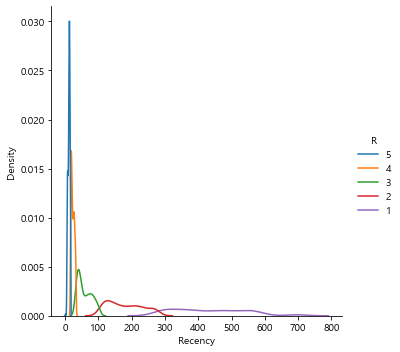

In [54]:
sns.displot(data=rfm, x="Recency", hue="R", kind="kde")

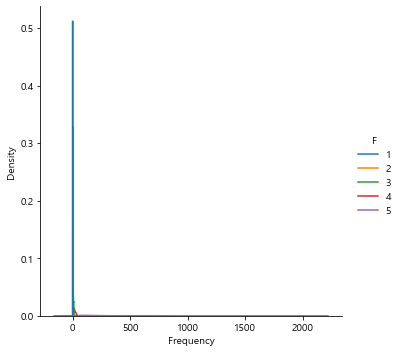

In [55]:
sns.displot(data=rfm, x="Frequency", hue="F", kind="kde")

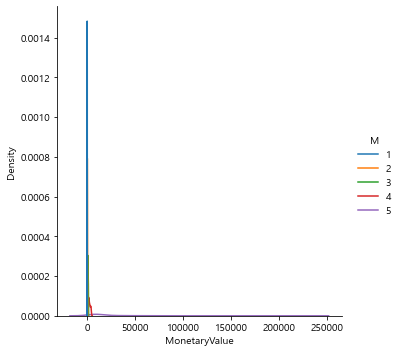

In [56]:
sns.displot(data=rfm, x="MonetaryValue", hue="M", kind="kde")

## RFM Segment 

In [57]:
# RFM_segment 값을 구해보자 
# R, F, M 값을 문자 그대로 붙여서 세그먼트를 구분
rfm["RFM_segment"] = rfm["R"].astype(str) + rfm["F"].astype(str) + rfm["M"].astype(str)
rfm.head(2)

,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment
seller_id,,,,,,,
0015a82c2db000af6aaaf3ae2ecb0532,321,3,2685.00,1,2,4,124
001cca7ae9ae17fb1caed9dfb1094831,53,239,25080.03,3,5,5,355


## RFM Score

In [58]:
# R, F, M 값의 합계를 구해서 세그먼트 점수 구하깅
rfm["RFM_score"]  = rfm[["R", "F", "M"]].sum(axis=1)
rfm.head(2)

,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment,RFM_score
seller_id,,,,,,,,
0015a82c2db000af6aaaf3ae2ecb0532,321,3,2685.00,1,2,4,124,7
001cca7ae9ae17fb1caed9dfb1094831,53,239,25080.03,3,5,5,355,13


<AxesSubplot:xlabel='RFM_segment', ylabel='RFM_score'>

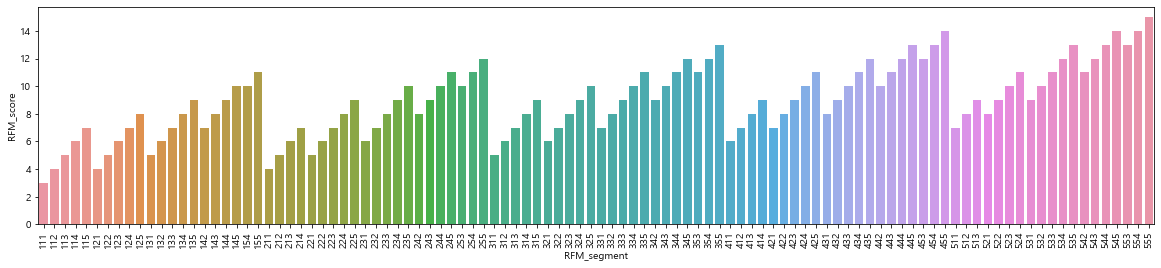

In [59]:
# RFM segment 값에 따라 정렬합니다.
plt.figure(figsize=(20, 4))
plt.xticks(rotation=90)
sns.barplot(data=rfm.sort_values("RFM_segment"), x="RFM_segment", y="RFM_score")

In [60]:
score_rfm = rfm.groupby(["RFM_score"]).agg({"Recency" : "mean", 
                                "Frequency" : "mean", 
                                "MonetaryValue" : ["sum", "mean"]})
score_rfm.style.background_gradient().format("{:,.0f}")

In [61]:
# qcut 을 통해 5단계로 "bronze", "silver", "gold", "platinum" , "diamond" 셀러등급 지정
rfm["RFM_class"] = pd.qcut(rfm["RFM_score"], q=5, labels=["bronze", "silver", "gold", "platinum" , "diamond" ])
rfm.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment,RFM_score,RFM_class
seller_id,,,,,,,,,
0015a82c2db000af6aaaf3ae2ecb0532,321,3,2685.00,1,2,4,124,7,silver
001cca7ae9ae17fb1caed9dfb1094831,53,239,25080.03,3,5,5,355,13,platinum
002100f778ceb8431b7a1020ff7ab48f,144,55,1234.50,2,5,3,253,10,gold
003554e2dce176b5555353e4f3555ac8,263,1,120.00,2,1,1,211,4,bronze
004c9cd9d87a3c30c522c48c4fc07416,123,170,19712.71,2,5,5,255,12,platinum


In [62]:
# "RFM_class" 별로 그룹화 하고 "RFM_score" 의 describe 값을 구합니다.
rfm.groupby("RFM_class")["RFM_score"].describe()

,count,mean,std,min,25%,50%,75%,max
RFM_class,,,,,,,,
bronze,678.0,4.079646,0.815017,3.0,3.0,4.0,5.0,5.0
silver,764.0,6.996073,0.816755,6.0,6.0,7.0,8.0,8.0
gold,492.0,9.495935,0.500492,9.0,9.0,9.0,10.0,10.0
platinum,712.0,11.977528,0.817908,11.0,11.0,12.0,13.0,13.0
diamond,407.0,14.567568,0.496023,14.0,14.0,15.0,15.0,15.0


<AxesSubplot:xlabel='RFM_class', ylabel='RFM_score'>

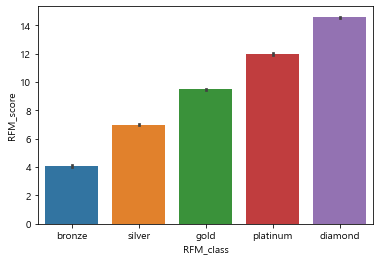

In [63]:
# barplot으로 RFM_class 별 평균 RFM_score 나타냅니다.
sns.barplot(data=rfm, x="RFM_class", y="RFM_score")

<AxesSubplot:xlabel='RFM_class', ylabel='RFM_score'>

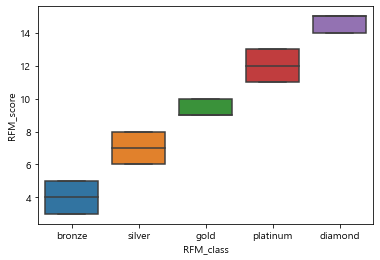

In [64]:
# boxplot으로 RFM_class 별 평균 RFM_score 나타냅니다.
sns.boxplot(data=rfm, x="RFM_class", y="RFM_score")

<AxesSubplot:xlabel='R', ylabel='RFM_score'>

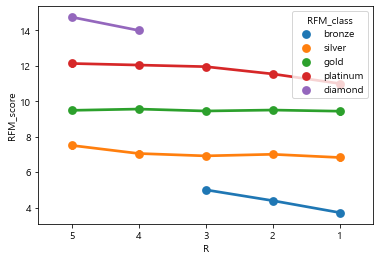

In [65]:
sns.pointplot(data=rfm, x="R", y="RFM_score", hue="RFM_class")

<AxesSubplot:xlabel='M', ylabel='RFM_score'>

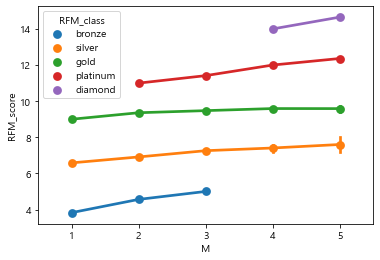

In [66]:
sns.pointplot(data=rfm, x="M", y="RFM_score", hue="RFM_class")

In [67]:
# "RFM_class" 별로 그룹화합니다.
# "Recency", "Frequency" 의 평균을 구합니다.
# "MonetaryValue"의 "mean", "sum", "count" 값을 구합니다.
rfm_agg = rfm.groupby("RFM_class").agg({"Recency": "mean", 
                              "Frequency": "mean",
                             "MonetaryValue": ["mean", "sum", "count" ]})

In [75]:
rfm[rfm['RFM_class'].str.contains('diamond')].sort_values('MonetaryValue', ascending = False)

,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment,RFM_score,RFM_class
seller_id,,,,,,,,,
4869f7a5dfa277a7dca6462dcf3b52b2,10,1155,229237.63,5,5,5,555,15,diamond
53243585a1d6dc2643021fd1853d8905,13,410,222776.05,5,5,5,555,15,diamond
4a3ca9315b744ce9f8e9374361493884,7,1985,200326.12,5,5,5,555,15,diamond
fa1c13f2614d7b5c4749cbc52fecda94,5,585,192842.13,5,5,5,555,15,diamond
7c67e1448b00f6e969d365cea6b010ab,27,1364,187923.89,4,5,5,455,14,diamond
...,...,...,...,...,...,...,...,...,...
116ccb1a1604bc88e4d234a8c23f33de,13,73,2004.89,5,5,4,554,14,diamond
c013e57c075a06e5b5c48ee03c525719,8,45,1971.55,5,5,4,554,14,diamond
729b2d09b2a0bdab221076327f13d050,13,61,1822.11,5,5,4,554,14,diamond


In [76]:
rfm[rfm['RFM_class'].str.contains('platinum')].sort_values('MonetaryValue', ascending = False)

,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment,RFM_score,RFM_class
seller_id,,,,,,,,,
7e93a43ef30c4f03f38b393420bc753a,52,336,172583.88,3,5,5,355,13,platinum
5dceca129747e92ff8ef7a997dc4f8ca,70,345,112085.63,3,5,5,355,13,platinum
8581055ce74af1daba164fdbd55a40de,138,432,64549.42,2,5,5,255,12,platinum
7ddcbb64b5bc1ef36ca8c151f6ec77df,78,341,55375.59,3,5,5,355,13,platinum
37be5a7c751166fbc5f8ccba4119e043,105,281,55350.55,2,5,5,255,12,platinum
...,...,...,...,...,...,...,...,...,...
6b803197e03abd5056b4313306b4f29d,14,12,407.00,5,4,2,542,11,platinum
ea00f977a203ff88adf7057cb7806998,14,19,389.72,5,4,2,542,11,platinum
ce616e1913288884e7742faac9d981db,13,24,365.10,5,4,2,542,11,platinum


In [68]:
rfm_agg.style.background_gradient()

In [69]:
rfm_agg.astype(int).style.format("{:,}")

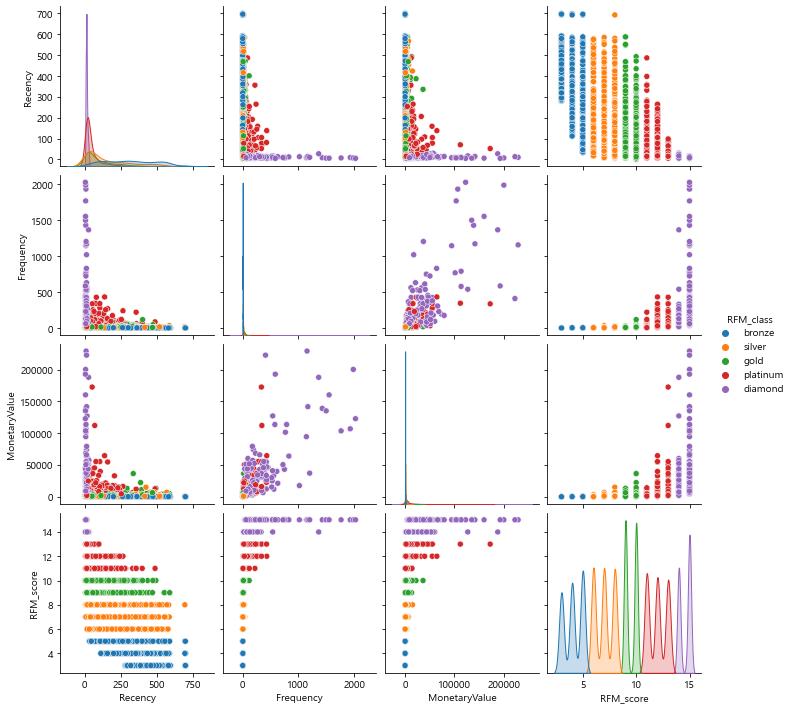

In [70]:
sns.pairplot(rfm, hue = "RFM_class" )

In [71]:
corr = rfm.corr()
corr

,Recency,Frequency,MonetaryValue,RFM_score
Recency,1.000000,-0.174595,-0.165596,-0.644770
Frequency,-0.174595,1.000000,0.796501,0.390004
MonetaryValue,-0.165596,0.796501,1.000000,0.386555
RFM_score,-0.644770,0.390004,0.386555,1.000000


<AxesSubplot:>

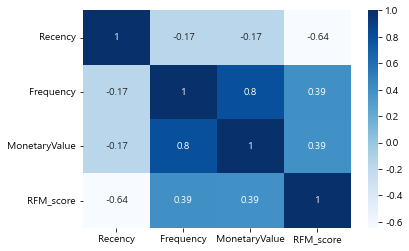

In [72]:
sns.heatmap(corr, 
            cmap = "Blues", 
            annot = True)

In [73]:
np.ones_like(corr)
mask = np.triu(np.ones_like(corr)) #마스킹 할 부분은 대각선 위에 부분이라는 명령어 
mask

array([[1., 1., 1., 1.],
       [0., 1., 1., 1.],
       [0., 0., 1., 1.],
       [0., 0., 0., 1.]])

<AxesSubplot:>

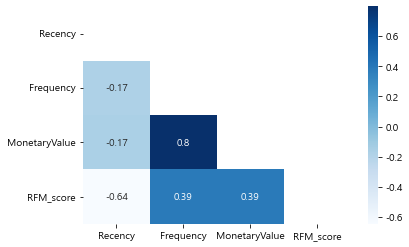

In [74]:
sns.heatmap(corr, cmap = "Blues", 
            annot = True, 
            mask = mask)

# Dual Axis, 파레토 차트 - 최상위셀러(diamond) x 매출(monetaryvalue) 

In [74]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt  # 시각화 라이브러리
import seaborn as sns            # 시각화 라이브러리

from tqdm import tqdm_notebook  # for문 진행상황을 게이지로 알려줌

In [75]:
rfm.sample(5)

,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment,RFM_score,RFM_class
seller_id,,,,,,,,,
8a87611c08849ffeeccab52aa798b6c7,548,14,2369.80,1,4,4,144,9,gold
b5bb2b985208834bd5bd86c7a402bbad,135,2,621.06,2,1,3,213,6,silver
a08692680c77d30a0b4280da5df01c5a,221,17,2433.00,2,4,4,244,10,gold
3076499bbc033a927bf4a8a41bcf7fd4,12,9,359.33,5,3,2,532,10,gold
910a922b426b7ff95eaee129ad6c0e1f,145,2,119.80,2,1,1,211,4,bronze


## 데이터 세팅

In [76]:
#rfm 등급중 최상위만 가지고 올거니까 (diamond 등급만) 
rfm_dia = rfm[rfm['RFM_class'].str.contains('diamond')]
rfm_dia
#407명

,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment,RFM_score,RFM_class
seller_id,,,,,,,,,
00ee68308b45bc5e2660cd833c3f81cc,25,172,20260.00,4,5,5,455,14,diamond
0176f73cc1195f367f7b32db1e5b3aa8,21,39,4733.10,4,5,5,455,14,diamond
01fdefa7697d26ad920e9e0346d4bd1b,14,131,14921.43,5,5,5,555,15,diamond
0241d4d5d36f10f80c644447315af0bd,6,246,31397.70,5,5,5,555,15,diamond
02ecc2a19303f05e59ce133fd923fff7,13,24,5264.19,5,4,5,545,14,diamond
...,...,...,...,...,...,...,...,...,...
fe2032dab1a61af8794248c8196565c9,13,306,65959.61,5,5,5,555,15,diamond
febab0275244b9a49a623f0bd613ca2f,17,129,7272.42,4,5,5,455,14,diamond
ff063b022a9a0aab91bad2c9088760b7,14,96,12076.50,5,5,5,555,15,diamond


In [77]:
# 셀러아이디 별로 카운트 할거니까(셀러아이디 너무 길어서 번호로 만든다는 뜻임) 인덱스 초기화 ~ 
rfm_dia.reset_index(drop = False, inplace = True)
rfm_dia

,seller_id,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment,RFM_score,RFM_class
0,00ee68308b45bc5e2660cd833c3f81cc,25,172,20260.00,4,5,5,455,14,diamond
1,0176f73cc1195f367f7b32db1e5b3aa8,21,39,4733.10,4,5,5,455,14,diamond
2,01fdefa7697d26ad920e9e0346d4bd1b,14,131,14921.43,5,5,5,555,15,diamond
3,0241d4d5d36f10f80c644447315af0bd,6,246,31397.70,5,5,5,555,15,diamond
4,02ecc2a19303f05e59ce133fd923fff7,13,24,5264.19,5,4,5,545,14,diamond
...,...,...,...,...,...,...,...,...,...,...
402,fe2032dab1a61af8794248c8196565c9,13,306,65959.61,5,5,5,555,15,diamond
403,febab0275244b9a49a623f0bd613ca2f,17,129,7272.42,4,5,5,455,14,diamond
404,ff063b022a9a0aab91bad2c9088760b7,14,96,12076.50,5,5,5,555,15,diamond
405,ff1fb4c404b2efe68b03350a8dc24122,14,49,6771.00,5,5,5,555,15,diamond


In [78]:
rfm_dia['seller_number'] = rfm_dia.index
rfm_dia

,seller_id,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment,RFM_score,RFM_class,seller_number
0,00ee68308b45bc5e2660cd833c3f81cc,25,172,20260.00,4,5,5,455,14,diamond,0
1,0176f73cc1195f367f7b32db1e5b3aa8,21,39,4733.10,4,5,5,455,14,diamond,1
2,01fdefa7697d26ad920e9e0346d4bd1b,14,131,14921.43,5,5,5,555,15,diamond,2
3,0241d4d5d36f10f80c644447315af0bd,6,246,31397.70,5,5,5,555,15,diamond,3
4,02ecc2a19303f05e59ce133fd923fff7,13,24,5264.19,5,4,5,545,14,diamond,4
...,...,...,...,...,...,...,...,...,...,...,...
402,fe2032dab1a61af8794248c8196565c9,13,306,65959.61,5,5,5,555,15,diamond,402
403,febab0275244b9a49a623f0bd613ca2f,17,129,7272.42,4,5,5,455,14,diamond,403
404,ff063b022a9a0aab91bad2c9088760b7,14,96,12076.50,5,5,5,555,15,diamond,404
405,ff1fb4c404b2efe68b03350a8dc24122,14,49,6771.00,5,5,5,555,15,diamond,405


In [79]:
# 컬럼순서 변경 ~
rfm_dia = rfm_dia[['seller_number','seller_id', 'Recency', 'Frequency', 'MonetaryValue', 'R', 'F', 'M',
       'RFM_segment', 'RFM_score', 'RFM_class']]

In [80]:
rfm_dia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   seller_number  407 non-null    int64   
 1   seller_id      407 non-null    object  
 2   Recency        407 non-null    int64   
 3   Frequency      407 non-null    int64   
 4   MonetaryValue  407 non-null    float64 
 5   R              407 non-null    category
 6   F              407 non-null    category
 7   M              407 non-null    category
 8   RFM_segment    407 non-null    object  
 9   RFM_score      407 non-null    int64   
 10  RFM_class      407 non-null    category
dtypes: category(4), float64(1), int64(4), object(2)
memory usage: 24.8+ KB


In [81]:
# seller_number 별로 카운트 : value_counts()
seller_counting = rfm_dia['MonetaryValue'].value_counts()
seller_counting.head(2)

20260.00    1
12775.84    1
Name: MonetaryValue, dtype: int64

## x축, y축 세팅

In [82]:
#x축 인덱스를 셀러 넘버로 셋팅 (아이디가 너무 길어서...)
x = seller_counting.index
# int 타입인 인덱스를 str로 변경해줘야함
    # 바꿔주지 않으면 x축이 범위값으로 잡힘

In [83]:
x = [str(i) for i in x] # int 값을 str 로 바꾸기
x[:406]

['20260.0',
 '12775.84',
 '50968.28',
 '4716.52',
 '7994.74',
 '8684.69',
 '8353.3',
 '5898.6',
 '11806.4',
 '4705.29',
 '7268.5',
 '4748.1',
 '17159.0',
 '101483.16',
 '4880.22',
 '14103.3',
 '9251.4',
 '6755.91',
 '13625.7',
 '14737.84',
 '7443.3',
 '24930.24',
 '13440.8',
 '26533.32',
 '26874.0',
 '44985.17',
 '12630.0',
 '5193.1',
 '43048.18',
 '15519.85',
 '13191.5',
 '1971.55',
 '25108.09',
 '4373.98',
 '10264.4',
 '7472.16',
 '4162.74',
 '44212.5',
 '6110.58',
 '8231.09',
 '4449.0',
 '42829.0',
 '2574.7799999999997',
 '5284.6',
 '4501.99',
 '6656.09',
 '11395.05',
 '10327.130000000001',
 '7726.9',
 '7827.29',
 '26361.82',
 '12708.55',
 '39907.5',
 '7555.0',
 '4147.29',
 '31396.65',
 '31095.98',
 '3157.2',
 '7442.55',
 '15383.34',
 '31918.21',
 '5363.01',
 '4538.29',
 '3955.0',
 '13132.2',
 '47017.69',
 '11002.89',
 '4754.99',
 '27049.53',
 '6409.68',
 '8338.25',
 '113628.97',
 '187923.89',
 '9332.09',
 '22505.1',
 '16320.99',
 '17535.69',
 '4232.54',
 '5642.6',
 '9979.7',
 '9027

In [84]:
#y축 monetaryvalue 별 셀러 수 나열
y = seller_counting.values

In [85]:
# 누적비율 구하기 : cumsum() 사용
ratio = y/y.sum()
ratio_sum = ratio.cumsum()
ratio_sum[:406]

array([0.002457  , 0.004914  , 0.00737101, 0.00982801, 0.01228501,
       0.01474201, 0.01719902, 0.01965602, 0.02211302, 0.02457002,
       0.02702703, 0.02948403, 0.03194103, 0.03439803, 0.03685504,
       0.03931204, 0.04176904, 0.04422604, 0.04668305, 0.04914005,
       0.05159705, 0.05405405, 0.05651106, 0.05896806, 0.06142506,
       0.06388206, 0.06633907, 0.06879607, 0.07125307, 0.07371007,
       0.07616708, 0.07862408, 0.08108108, 0.08353808, 0.08599509,
       0.08845209, 0.09090909, 0.09336609, 0.0958231 , 0.0982801 ,
       0.1007371 , 0.1031941 , 0.10565111, 0.10810811, 0.11056511,
       0.11302211, 0.11547912, 0.11793612, 0.12039312, 0.12285012,
       0.12530713, 0.12776413, 0.13022113, 0.13267813, 0.13513514,
       0.13759214, 0.14004914, 0.14250614, 0.14496314, 0.14742015,
       0.14987715, 0.15233415, 0.15479115, 0.15724816, 0.15970516,
       0.16216216, 0.16461916, 0.16707617, 0.16953317, 0.17199017,
       0.17444717, 0.17690418, 0.17936118, 0.18181818, 0.18427

## 그래프 그리기

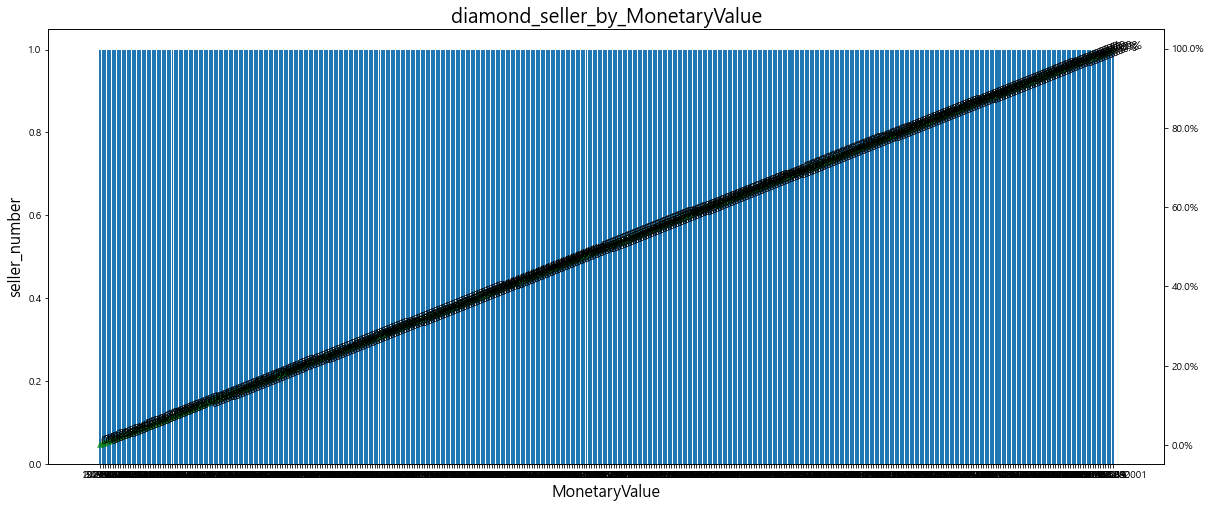

In [ ]:
fig, barChart = plt.subplots(figsize=(20,8))  # 그래프 size

barChart.bar(x,y) # barChart 에 x,y 값 넣기

# 라인차트 생성
lineChart = barChart.twinx()
    # 두 개의 차트가 같은 x축, 다른 y축 사용하게 해줌
lineChart.plot(x, ratio_sum, '-g^', alpha = 0.5)  # alpha : 투명도

# 누적비율(라인차트 축) 레이블
ranges = lineChart.get_yticks() # y차트의 단위들
lineChart.set_yticklabels(['{0:.1%}'.format(x) for x in ranges])
# ranges

# 라인차트에 % 값 표시
ratio_sum_percentages = ['{0:.0%}'.format(x) for x in ratio_sum]
for i, txt in enumerate(ratio_sum_percentages):
    lineChart.annotate(txt, (x[i], ratio_sum[i]), fontsize=12)

# x, y label 만들기
barChart.set_xlabel('MonetaryValue', fontdict={'size':16})
barChart.set_ylabel('seller_number', fontdict={'size':16})

plt.title('diamond_seller_by_MonetaryValue', fontsize = 20);

In [ ]:
## 이렇게 그래프가 나온 이유 : monetaryvalue 값이 다 유니크해서.... 구간?설정이 안됨.... 중복값이 있어야 그루핑을 해서 밸류카운트로 만들수 있는데...

In [ ]:
# 태블로로 작업한거 불러오기
import numpy as np

from PIL import Image

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# 파일 열기

path = './dia seller.PNG'

image_pil = Image.open(path)
image = np.array(image_pil)

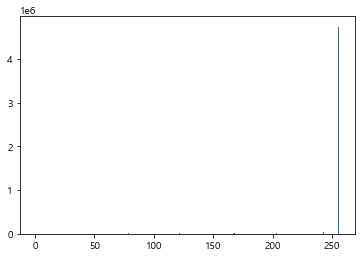

In [ ]:
image.shape


#이미지 range 확인
np.min(image), np.max(image)


#이미지 시각화
plt.hist(image.ravel(),256,[0,256])
plt.show()

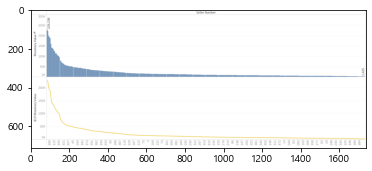

In [ ]:

# 파레토 법칙으로 그림 나오긴 함 ... ㅠㅠ
plt.imshow(image)
plt.show()

## 다른 컬럼으로 파레토 분석 시도

In [ ]:
rfm_dia

,seller_number,seller_id,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment,RFM_score,RFM_class
0,0,00ee68308b45bc5e2660cd833c3f81cc,25,172,20260.00,4,5,5,455,14,diamond
1,1,0176f73cc1195f367f7b32db1e5b3aa8,21,39,4733.10,4,5,5,455,14,diamond
2,2,01fdefa7697d26ad920e9e0346d4bd1b,14,131,14921.43,5,5,5,555,15,diamond
3,3,0241d4d5d36f10f80c644447315af0bd,6,246,31397.70,5,5,5,555,15,diamond
4,4,02ecc2a19303f05e59ce133fd923fff7,13,24,5264.19,5,4,5,545,14,diamond
...,...,...,...,...,...,...,...,...,...,...,...
402,402,fe2032dab1a61af8794248c8196565c9,13,306,65959.61,5,5,5,555,15,diamond
403,403,febab0275244b9a49a623f0bd613ca2f,17,129,7272.42,4,5,5,455,14,diamond
404,404,ff063b022a9a0aab91bad2c9088760b7,14,96,12076.50,5,5,5,555,15,diamond
405,405,ff1fb4c404b2efe68b03350a8dc24122,14,49,6771.00,5,5,5,555,15,diamond


In [ ]:
# 최상위에서 그나마 파레토 그루핑 할 수 있는게 프리퀀시...인듯.... 
rfm_dia['Frequency'].nunique()

216

In [ ]:
# 프리퀀시 별로 카운드 : VALUE_COUNTS()
seller_counting = rfm_dia['Frequency'].value_counts()
seller_counting.head(3)

84    8
38    7
95    6
Name: Frequency, dtype: int64

In [ ]:
rfm_dia.sort_values(['Frequency'])

,seller_number,seller_id,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment,RFM_score,RFM_class
353,353,dbdd0ec73a4817971d962698f2fea022,15,16,6384.00,5,4,5,545,14,diamond
155,155,610f72e407cdd7caaa2f8167b0163fd8,9,17,13585.16,5,4,5,545,14,diamond
166,166,67883baaae6134ee81b271a542613728,12,19,8167.90,5,4,5,545,14,diamond
325,325,ce69a8021d18961dd2a40269b7c2c293,14,19,4818.00,5,4,5,545,14,diamond
285,285,b4f8921fcc4ff77b66bea6dda43dcd51,13,20,11395.05,5,4,5,545,14,diamond
...,...,...,...,...,...,...,...,...,...,...,...
348,348,da8622b14eb17ae2831f4ac5b9dab84a,6,1551,160236.57,5,5,5,555,15,diamond
318,318,cc419e0650a3c5ba77189a1882b7556a,7,1766,103634.51,5,5,5,555,15,diamond
58,58,1f50f920176fa81dab994f9023523100,9,1930,106889.31,5,5,5,555,15,diamond
120,120,4a3ca9315b744ce9f8e9374361493884,7,1985,200326.12,5,5,5,555,15,diamond


## x축, y축 세팅

In [ ]:
#x축 인덱스를 Frequency로 셋팅 
x = seller_counting.index
# int 타입인 인덱스를 str로 변경해줘야함
    # 바꿔주지 않으면 x축이 범위값으로 잡힘

In [ ]:
x = [str(i) for i in x] # int 값을 str 로 바꾸기
x[:406]

['84',
 '38',
 '95',
 '44',
 '66',
 '43',
 '74',
 '40',
 '60',
 '46',
 '69',
 '61',
 '52',
 '78',
 '55',
 '54',
 '31',
 '47',
 '49',
 '59',
 '71',
 '97',
 '104',
 '130',
 '39',
 '45',
 '180',
 '165',
 '86',
 '425',
 '80',
 '88',
 '98',
 '156',
 '63',
 '50',
 '110',
 '67',
 '137',
 '65',
 '92',
 '30',
 '172',
 '73',
 '51',
 '146',
 '94',
 '85',
 '53',
 '268',
 '62',
 '131',
 '72',
 '209',
 '58',
 '57',
 '135',
 '48',
 '183',
 '216',
 '90',
 '56',
 '75',
 '101',
 '70',
 '20',
 '68',
 '19',
 '21',
 '22',
 '89',
 '127',
 '176',
 '144',
 '77',
 '24',
 '175',
 '91',
 '111',
 '339',
 '193',
 '42',
 '410',
 '41',
 '269',
 '129',
 '140',
 '220',
 '128',
 '126',
 '102',
 '32',
 '121',
 '99',
 '149',
 '36',
 '64',
 '138',
 '359',
 '230',
 '723',
 '119',
 '263',
 '767',
 '16',
 '430',
 '227',
 '301',
 '106',
 '306',
 '1018',
 '118',
 '82',
 '76',
 '100',
 '246',
 '365',
 '1498',
 '585',
 '195',
 '225',
 '200',
 '169',
 '155',
 '139',
 '536',
 '249',
 '108',
 '630',
 '240',
 '164',
 '192',
 '829',


In [ ]:
#y축 Frequency 별 셀러 수 나열
y = seller_counting.values

In [ ]:
# 누적비율 구하기 : cumsum() 사용
ratio = y/y.sum()
ratio_sum = ratio.cumsum()
ratio_sum[:406]

array([0.01965602, 0.03685504, 0.05159705, 0.06633907, 0.07862408,
       0.09090909, 0.1031941 , 0.11547912, 0.12776413, 0.14004914,
       0.15233415, 0.16461916, 0.17444717, 0.18427518, 0.19410319,
       0.2039312 , 0.21375921, 0.22358722, 0.23341523, 0.24324324,
       0.25307125, 0.26289926, 0.27272727, 0.28255528, 0.29238329,
       0.3022113 , 0.30958231, 0.31695332, 0.32432432, 0.33169533,
       0.33906634, 0.34643735, 0.35380835, 0.36117936, 0.36855037,
       0.37592138, 0.38329238, 0.39066339, 0.3980344 , 0.40540541,
       0.41277641, 0.42014742, 0.42751843, 0.43488943, 0.44226044,
       0.44963145, 0.45700246, 0.46437346, 0.47174447, 0.47665848,
       0.48157248, 0.48648649, 0.49140049, 0.4963145 , 0.5012285 ,
       0.50614251, 0.51105651, 0.51597052, 0.52088452, 0.52579853,
       0.53071253, 0.53562654, 0.54054054, 0.54545455, 0.55036855,
       0.55528256, 0.56019656, 0.56511057, 0.57002457, 0.57493857,
       0.57985258, 0.58476658, 0.58968059, 0.59459459, 0.59950

In [ ]:
## 그래프그리기

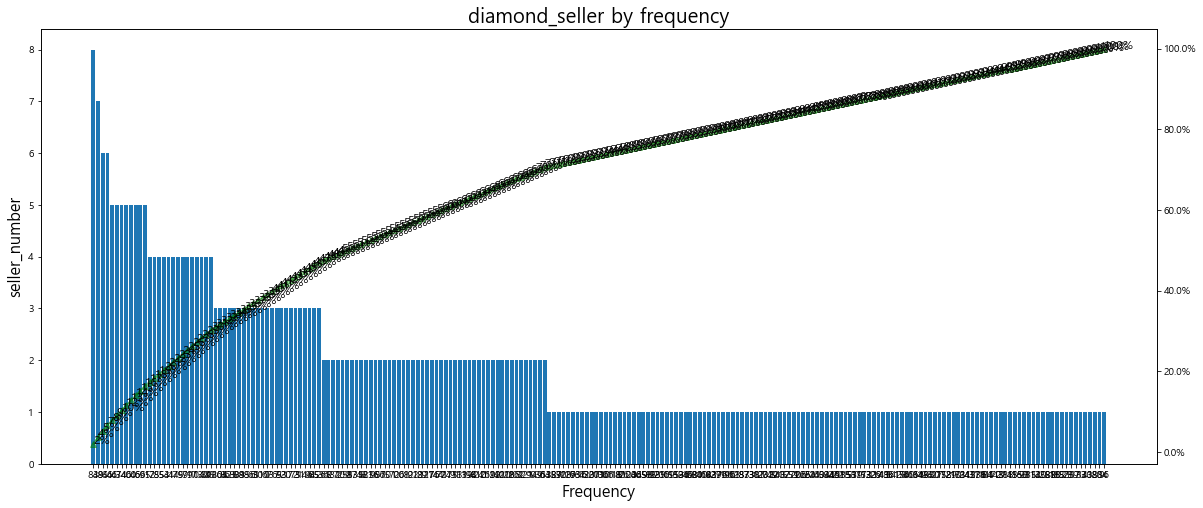

In [101]:
fig, barChart = plt.subplots(figsize=(20,8))  # 그래프 size

barChart.bar(x,y) # barChart 에 x,y 값 넣기

# 라인차트 생성
lineChart = barChart.twinx()
    # 두 개의 차트가 같은 x축, 다른 y축 사용하게 해줌
lineChart.plot(x, ratio_sum, '-g^', alpha = 0.5)  # alpha : 투명도

# 누적비율(라인차트 축) 레이블
ranges = lineChart.get_yticks() # y차트의 단위들
lineChart.set_yticklabels(['{0:.1%}'.format(x) for x in ranges])
# ranges

# 라인차트에 % 값 표시
ratio_sum_percentages = ['{0:.0%}'.format(x) for x in ratio_sum]
for i, txt in enumerate(ratio_sum_percentages):
    lineChart.annotate(txt, (x[i], ratio_sum[i]), fontsize=12)

# x, y label 만들기
barChart.set_xlabel('Frequency', fontdict={'size':16})
barChart.set_ylabel('seller_number', fontdict={'size':16})

plt.title('diamond_seller by frequency', fontsize = 20);

In [102]:
# 프리퀀시 84인 그룹이 리드한다
seller_counting

84     8
38     7
95     6
44     6
66     5
      ..
133    1
405    1
188    1
204    1
96     1
Name: Frequency, Length: 216, dtype: int64

사실... 이 결과값이 최상위를 파레토 분류하는데 의미가 있나? 싶은데 .... 

# 전체 등급으로 파레토 차트 만들기 

## 데이터 세팅

In [103]:
# 등급 별 셀러의 수 비율을 나타내기 위해 먼저 등급 별로 카운트한 데이터 만들기 
rfm

,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment,RFM_score,RFM_class
seller_id,,,,,,,,,
0015a82c2db000af6aaaf3ae2ecb0532,321,3,2685.00,1,2,4,124,7,silver
001cca7ae9ae17fb1caed9dfb1094831,53,239,25080.03,3,5,5,355,13,platinum
002100f778ceb8431b7a1020ff7ab48f,144,55,1234.50,2,5,3,253,10,gold
003554e2dce176b5555353e4f3555ac8,263,1,120.00,2,1,1,211,4,bronze
004c9cd9d87a3c30c522c48c4fc07416,123,170,19712.71,2,5,5,255,12,platinum
...,...,...,...,...,...,...,...,...,...
ffc470761de7d0232558ba5e786e57b7,17,31,1649.01,4,4,4,444,12,platinum
ffdd9f82b9a447f6f8d4b91554cc7dd3,15,20,2101.20,5,4,4,544,13,platinum
ffeee66ac5d5a62fe688b9d26f83f534,113,14,1839.86,2,4,4,244,10,gold


In [104]:
rfm.reset_index(drop = False, inplace = True)

In [105]:
# RFM_class 별로 카운트 : value_counts()
seller_counting = rfm_dia['RFM_segment'].value_counts()
seller_counting.head(2)

555    231
455     99
Name: RFM_segment, dtype: int64

## x축, y축 세팅

In [106]:
#x축 인덱스를 클래스로 셋팅
x = seller_counting.index
# int 타입인 인덱스를 str로 변경해줘야함
    # 바꿔주지 않으면 x축이 범위값으로 잡힘

In [107]:
x = [str(i) for i in x] # int 값을 str 로 바꾸기
x[:3053]

['555', '455', '554', '545']

In [108]:
#y축  셀러 수 나열
y = seller_counting.values

In [109]:
# 누적비율 구하기 : cumsum() 사용
ratio = y/y.sum()
ratio_sum = ratio.cumsum()
ratio_sum[:3054]

array([0.56756757, 0.81081081, 0.94103194, 1.        ])

## 그래프 그리기

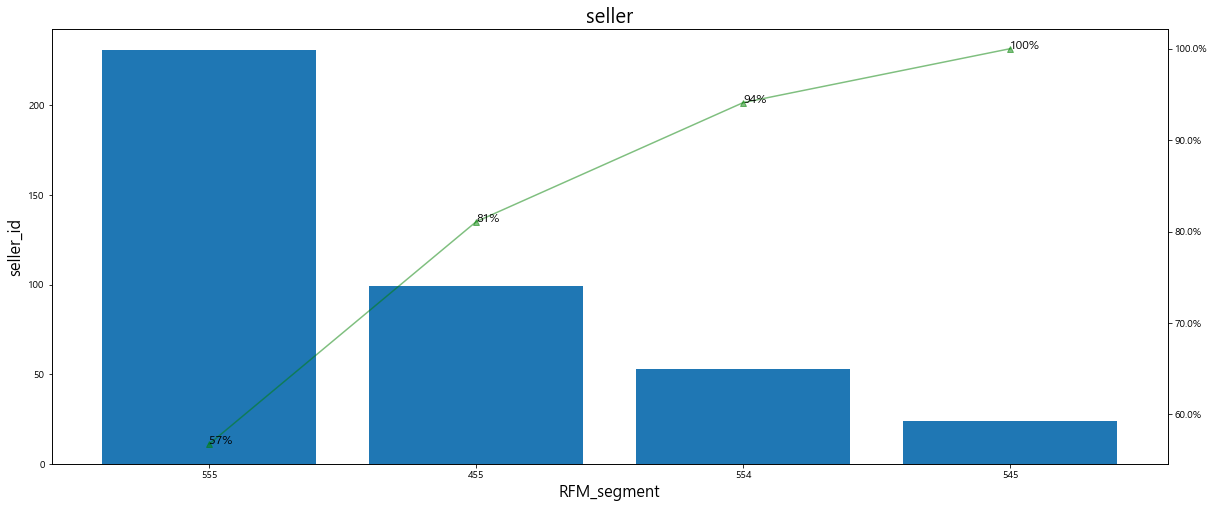

In [110]:
fig, barChart = plt.subplots(figsize=(20,8))  # 그래프 size

barChart.bar(x,y) # barChart 에 x,y 값 넣기

# 라인차트 생성
lineChart = barChart.twinx()
    # 두 개의 차트가 같은 x축, 다른 y축 사용하게 해줌
lineChart.plot(x, ratio_sum, '-g^', alpha = 0.5)  # alpha : 투명도

# 누적비율(라인차트 축) 레이블
ranges = lineChart.get_yticks() # y차트의 단위들
lineChart.set_yticklabels(['{0:.1%}'.format(x) for x in ranges])
# ranges

# 라인차트에 % 값 표시
ratio_sum_percentages = ['{0:.0%}'.format(x) for x in ratio_sum]
for i, txt in enumerate(ratio_sum_percentages):
    lineChart.annotate(txt, (x[i], ratio_sum[i]), fontsize=12)

# x, y label 만들기
barChart.set_xlabel('RFM_segment', fontdict={'size':16})
barChart.set_ylabel('seller_id', fontdict={'size':16})

plt.title('seller', fontsize = 20);

## MonetaryValue 별로 파레토 해보기

In [111]:
rfm['MonetaryValue'].nunique()

2751

In [112]:
# MonetaryValue 별로 카운트 : value_counts()
seller_counting = rfm_dia['MonetaryValue'].value_counts()
seller_counting.head(2)

20260.00    1
12775.84    1
Name: MonetaryValue, dtype: int64

In [113]:
#x축 인덱스를 클래스로 셋팅
x = seller_counting.index
# int 타입인 인덱스를 str로 변경해줘야함
    # 바꿔주지 않으면 x축이 범위값으로 잡힘

In [114]:
x = [str(i) for i in x] # int 값을 str 로 바꾸기
x[:3053]

['20260.0',
 '12775.84',
 '50968.28',
 '4716.52',
 '7994.74',
 '8684.69',
 '8353.3',
 '5898.6',
 '11806.4',
 '4705.29',
 '7268.5',
 '4748.1',
 '17159.0',
 '101483.16',
 '4880.22',
 '14103.3',
 '9251.4',
 '6755.91',
 '13625.7',
 '14737.84',
 '7443.3',
 '24930.24',
 '13440.8',
 '26533.32',
 '26874.0',
 '44985.17',
 '12630.0',
 '5193.1',
 '43048.18',
 '15519.85',
 '13191.5',
 '1971.55',
 '25108.09',
 '4373.98',
 '10264.4',
 '7472.16',
 '4162.74',
 '44212.5',
 '6110.58',
 '8231.09',
 '4449.0',
 '42829.0',
 '2574.7799999999997',
 '5284.6',
 '4501.99',
 '6656.09',
 '11395.05',
 '10327.130000000001',
 '7726.9',
 '7827.29',
 '26361.82',
 '12708.55',
 '39907.5',
 '7555.0',
 '4147.29',
 '31396.65',
 '31095.98',
 '3157.2',
 '7442.55',
 '15383.34',
 '31918.21',
 '5363.01',
 '4538.29',
 '3955.0',
 '13132.2',
 '47017.69',
 '11002.89',
 '4754.99',
 '27049.53',
 '6409.68',
 '8338.25',
 '113628.97',
 '187923.89',
 '9332.09',
 '22505.1',
 '16320.99',
 '17535.69',
 '4232.54',
 '5642.6',
 '9979.7',
 '9027

In [115]:
#y축  셀러 수 나열
y = seller_counting.values

In [116]:
# 누적비율 구하기 : cumsum() 사용
ratio = y/y.sum()
ratio_sum = ratio.cumsum()
ratio_sum[:3054]

array([0.002457  , 0.004914  , 0.00737101, 0.00982801, 0.01228501,
       0.01474201, 0.01719902, 0.01965602, 0.02211302, 0.02457002,
       0.02702703, 0.02948403, 0.03194103, 0.03439803, 0.03685504,
       0.03931204, 0.04176904, 0.04422604, 0.04668305, 0.04914005,
       0.05159705, 0.05405405, 0.05651106, 0.05896806, 0.06142506,
       0.06388206, 0.06633907, 0.06879607, 0.07125307, 0.07371007,
       0.07616708, 0.07862408, 0.08108108, 0.08353808, 0.08599509,
       0.08845209, 0.09090909, 0.09336609, 0.0958231 , 0.0982801 ,
       0.1007371 , 0.1031941 , 0.10565111, 0.10810811, 0.11056511,
       0.11302211, 0.11547912, 0.11793612, 0.12039312, 0.12285012,
       0.12530713, 0.12776413, 0.13022113, 0.13267813, 0.13513514,
       0.13759214, 0.14004914, 0.14250614, 0.14496314, 0.14742015,
       0.14987715, 0.15233415, 0.15479115, 0.15724816, 0.15970516,
       0.16216216, 0.16461916, 0.16707617, 0.16953317, 0.17199017,
       0.17444717, 0.17690418, 0.17936118, 0.18181818, 0.18427

## 팔레토분석 상위 몇프로의 셀러가 전체 매출의 몇프로차지하는지 분석

In [121]:
#상위 10% 다이아몬드 매출 합 / 전체 매출  * 100 
top_10 = rfm[rfm['RFM_class'].str.contains('diamond')]
top_10

,seller_id,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment,RFM_score,RFM_class
8,00ee68308b45bc5e2660cd833c3f81cc,25,172,20260.00,4,5,5,455,14,diamond
17,0176f73cc1195f367f7b32db1e5b3aa8,21,39,4733.10,4,5,5,455,14,diamond
23,01fdefa7697d26ad920e9e0346d4bd1b,14,131,14921.43,5,5,5,555,15,diamond
24,0241d4d5d36f10f80c644447315af0bd,6,246,31397.70,5,5,5,555,15,diamond
33,02ecc2a19303f05e59ce133fd923fff7,13,24,5264.19,5,4,5,545,14,diamond
...,...,...,...,...,...,...,...,...,...,...
3023,fe2032dab1a61af8794248c8196565c9,13,306,65959.61,5,5,5,555,15,diamond
3032,febab0275244b9a49a623f0bd613ca2f,17,129,7272.42,4,5,5,455,14,diamond
3038,ff063b022a9a0aab91bad2c9088760b7,14,96,12076.50,5,5,5,555,15,diamond
3040,ff1fb4c404b2efe68b03350a8dc24122,14,49,6771.00,5,5,5,555,15,diamond


In [122]:
#상위 10%의 셀러들이 olist 전체 판매의 60.59 %를 차지한다 
top_10['MonetaryValue'].sum() / rfm['MonetaryValue'].sum() * 100

60.59936500744529

In [120]:
#전체 61 % 차지함 !!!

In [124]:
#상위 20% 다이아몬드 + 플래티넘 매출 합 / 전체 매출  * 100 
top_20 = rfm[rfm['RFM_class'].str.contains('diamond') | rfm['RFM_class'].str.contains('platinum')]
top_20

,seller_id,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment,RFM_score,RFM_class
1,001cca7ae9ae17fb1caed9dfb1094831,53,239,25080.03,3,5,5,355,13,platinum
4,004c9cd9d87a3c30c522c48c4fc07416,123,170,19712.71,2,5,5,255,12,platinum
5,00720abe85ba0859807595bbf045a33b,31,26,1007.50,4,4,3,443,11,platinum
8,00ee68308b45bc5e2660cd833c3f81cc,25,172,20260.00,4,5,5,455,14,diamond
9,00fc707aaaad2d31347cf883cd2dfe10,82,135,12684.90,3,5,5,355,13,platinum
...,...,...,...,...,...,...,...,...,...,...
3044,ff69aa92bb6b1bf9b8b7a51c2ed9cf8b,77,20,21940.80,3,4,5,345,12,platinum
3046,ffa6adafb71b807dc13159e26431354c,21,18,2669.90,4,4,4,444,12,platinum
3048,ffc470761de7d0232558ba5e786e57b7,17,31,1649.01,4,4,4,444,12,platinum
3049,ffdd9f82b9a447f6f8d4b91554cc7dd3,15,20,2101.20,5,4,4,544,13,platinum


In [125]:
top_20['MonetaryValue'].sum() / rfm['MonetaryValue'].sum() * 100

89.14807194320805

In [132]:
rfm.shape

(3053, 10)

In [133]:
#상위 20%셀러는 610번까지 
3053 * 0.2

610.6

In [136]:
top_20 = rfm.sort_values('MonetaryValue', ascending = False).reset_index()

In [138]:
top_20 = rfm.sort_values('MonetaryValue', ascending = False).reset_index()
top_20.iloc[ :611, :]

,index,seller_id,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment,RFM_score,RFM_class
0,849,4869f7a5dfa277a7dca6462dcf3b52b2,10,1155,229237.63,5,5,5,555,15,diamond
1,1000,53243585a1d6dc2643021fd1853d8905,13,410,222776.05,5,5,5,555,15,diamond
2,873,4a3ca9315b744ce9f8e9374361493884,7,1985,200326.12,5,5,5,555,15,diamond
3,2984,fa1c13f2614d7b5c4749cbc52fecda94,5,585,192842.13,5,5,5,555,15,diamond
4,1515,7c67e1448b00f6e969d365cea6b010ab,27,1364,187923.89,4,5,5,455,14,diamond
...,...,...,...,...,...,...,...,...,...,...,...
606,648,37dd29b36c458d82f74a953c40c43645,98,8,4536.99,3,3,5,335,11,platinum
607,234,13fa2a6c6b9d0f43cb588d7c82117a12,341,10,4528.00,1,3,5,135,9,gold
608,2394,c840d3fdbba0790404fdae73d253b253,66,14,4522.28,3,4,5,345,12,platinum
609,282,180c3376aff0e43dd5788709df48a843,243,10,4513.00,2,3,5,235,10,gold


In [139]:
#상위 20%의 셀러들이 olist 전체 판매의 82.57%를 차지한다 
top_20.iloc[ :611, :]['MonetaryValue'].sum() / rfm['MonetaryValue'].sum() * 100

82.57799775405216